## **Code to predict probability of credit card defaulting based on UCL data**

Making necessary imports

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set("notebook")

In [4]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

f:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Reading excel file and converting to CSV

In [6]:
df = pd.read_excel("./Credit_Card_Data.xlsx")
df.to_csv("./UCL_Credit_Card_data.csv", sep=",",header = ['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAYMENT_STATUS'])

 ### ***Data Exploration***

In [7]:
print(df.head)

<bound method NDFrame.head of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  \
0          1      20000    2          2         1   24   
1          2     120000    2          2         2   26   
2          3      90000    2          2         2   34   
3          4      50000    2          2         1   37   
4          5      50000    1          2         1   57   
5          6      50000    1          1         2   37   
6          7     500000    1          1         2   29   
7          8     100000    2          2         2   23   
8          9     140000    2          3         1   28   
9         10      20000    1          3         2   35   
10        11     200000    2          3         2   34   
11        12     260000    2          1         2   51   
12        13     630000    2          2         2   41   
13        14      70000    1          2         2   30   
14        15     250000    1          1         2   29   
15        16      50000    2          3   

In [8]:
#checking the data types
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
default.payment.next.month    int64
dtype: object

In [10]:
#checking for null values
print(df.isna().sum()/df.shape[0])

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
default.payment.next.month    0.0
dtype: float64


Data contains no null values. It appears the dataset was already cleaned

### Getting measures of central tendency and other statistics

In [11]:
print(df.describe(include='all'))

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE  default.payment.next.month  
count  30000.000000                30000.000000  
mean      35.485500                    0.221200  
std        9.217904                    0.415062  
min       21.000000                    0.000000  
25%       28.000000 

In [13]:
#Checking for skew and Kurtosis
stats.describe(df)

DescribeResult(nobs=30000, minmax=(array([    1, 10000,     1,     0,     0,    21,     0], dtype=int64), array([  30000, 1000000,       2,       6,       3,      79,       1],
      dtype=int64)), mean=array([1.50005000e+04, 1.67484323e+05, 1.60373333e+00, 1.85313333e+00,
       1.55186667e+00, 3.54855000e+01, 2.21200000e-01]), variance=array([7.50025000e+07, 1.68344557e+10, 2.39247370e-01, 6.24651004e-01,
       2.72452264e-01, 8.49697554e+01, 1.72276303e-01]), skewness=array([-2.56600120e-17,  9.92817316e-01, -4.24162218e-01,  9.70923499e-01,
       -1.87407439e-02,  7.32209256e-01,  1.34343677e+00]), kurtosis=array([-1.2       ,  0.53597353, -1.82008641,  2.07807519, -1.36334053,
        0.044096  , -0.19517763]))

In [15]:
#finding pearson correlation between parameters
pearson = df.corr(method='pearson')
pearson

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,0.013890
default.payment.next.month,-0.013952,-0.153520,-0.039961,0.028006,-0.024339,0.013890,1.000000


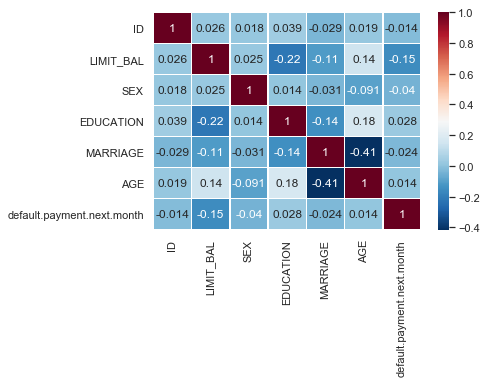

In [20]:
#Heatmap to visually display the correlation

sns.heatmap(pearson,xticklabels=pearson.columns,yticklabels=pearson.columns,cmap='RdBu_r',annot=True,linewidth=0.5)

Strong correlation is observed between age and marriage. Relatively strong correlation between education and Balance Limit.
The parameter seen to have the most correlation with payment defaulting is Balance Limit

### Creating the predictive model

Splitting test and train data

In [4]:

df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

x_train = train.iloc[:,1:6]
y_train = train.iloc[:,6:7]
x_test = train.iloc[:,1:6]
y_test = train.iloc[:,6:7]

Creating our model

In [5]:
clf = LogisticRegression()
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy computation

In [6]:
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.7762674679257882


The above uses logistic regression to predict the probability of credit card defaulting, and achieves an accuracy of 77.62%
Tweaking the parameters of the Logitsic regression model may result in higher accuracy.
Other models such as decision trees(boosted) should be considered to achieve higher accuracy in the classification
This notebook will be further developed to explore the above options